# Part II - Teachers' and parents' impact on well-being and success of students in PISA study 2012
## by Philipp Nockemann


## Investigation Overview


- My goal in this slide show is to get some insight into which parental, emotional and teacheral circumstances impact student's success in terms of final weight in PISA 2012 study. 
- I chose four visualizations for this slide show, which will lead to some key insights as follows: 
    - Visualization 1 - Parental background and success 
    - Visualization 2 - Sense of belonging and success 
    - Visualization 3 - Follow up: Teacher's behaviour and sense of belonging 
    - Visualization 4 - Student-teacher-relationship and success by sense of belonging ranges.


## Dataset Overview

This investigated dataset is the result of PISA study. This study examines how well students have learned the school curriculum, how well prepared they are for life beyond school. Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
cols_of_interest =[0, 11, 26, 31, 32, 37, 77, 
                   78, 187, 192, 199, 205, 222, 
                   225, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 
                   243, 244, 245, 246, 416, 426, 
                   471, 480, 490, 550]

#Read in PISA dictionary
pisa12_dict = pd.read_csv('pisadict2012.csv', encoding='latin-1')

#Select only columns of interest from the dictionary and check if they're correct
pisa12_interest_dict = pisa12_dict.loc[cols_of_interest, :]

#From pisa2012.csv load only columns of interest into a dataframe
pisa12 = pd.read_csv('pisa2012.csv', usecols=pisa12_interest_dict.iloc[:,0], encoding='latin-1')

#Rename Columns frome encoded names to descriptions in dictionary
pisa12.columns = pisa12_interest_dict.iloc[:,1]

#Make adjustments in column names for simplification
pisa12 = pisa12.rename(columns={'Country code 3-character' : 'Country',
                                'Mother<Highest Schooling>' : 'Mother\'s Highest Schooling',
                                'Father<Highest Schooling>' : 'Father\'s Highest Schooling',
                                'Subjective Norms - Parents Believe Studying Mathematics Is Important' : 
                                'Parents Believe Studying Mathematics Is Important', 
                                'Subjective Norms - Parents Believe Mathematics Is Important for Career' : 
                                'Parents Believe Mathematics Is Important for Career', 
                                'Math Teaching - Teacher shows interest' : 'Teacher shows interest', 
                                'Teacher-Directed Instruction - Sets Clear Goals' : 'Teacher sets Clear Goals',
                                'Teacher-Directed Instruction - Summarizes Previous Lessons' : 'Teacher summarizes Previous Lessons',
                                'Cognitive Activation - Teacher Encourages to Reflect Problems' : 'Teacher encourages to reflect Problems',
                                'Teacher Support - Lets Us Know We Have to Work Hard' : 'Teacher emphasizes Importance of Hard Work',
                                'Teacher Support - Gives Opportunity to Express Opinions' : 'Teacher gives Opportunity to Express Opinions',
                                'Student-Teacher Relation - Get Along with Teachers' : 'Relation - Get Along with Teachers',
                                'Student-Teacher Relation - Teachers Are Interested' : 'Relation - Teachers Are Interested',
                                'Student-Teacher Relation - Teachers Listen to Students' : 'Relation - Teachers Listen to Students',
                                'Student-Teacher Relation - Teachers Help Students' : 'Relation - Teachers Help Students',
                                'Student-Teacher Relation - Teachers Treat Students Fair' : 'Relation - Teachers Treat Students Fair',
                                'FINAL STUDENT WEIGHT' : 'Final student weight'
                               })

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
pisa12['Mother\'s Highest Schooling'].unique()

array(['<ISCED level 3A> ', '<ISCED level 3B, 3C> ',
       'She did not complete <ISCED level 1> ', '<ISCED level 2> ',
       '<ISCED level 1> ', nan], dtype=object)

In [4]:
pisa12['Mother\'s Highest Schooling'] = pisa12['Mother\'s Highest Schooling'].str.replace('<|>| $', '', regex=True)
pisa12['Mother\'s Highest Schooling'] = pisa12['Mother\'s Highest Schooling'].str.replace('She did not complete ISCED level 1', 'ISCED level 1 not completed', regex=False)

pisa12['Father\'s Highest Schooling'] = pisa12['Father\'s Highest Schooling'].str.replace('<|>| $', '', regex=True)
pisa12['Father\'s Highest Schooling'] = pisa12['Father\'s Highest Schooling'].str.replace('He did not complete ISCED level 1', 'ISCED level 1 not completed', regex=False)

#Set bar order level
levels_order = ['ISCED level 1 not completed', 
                'ISCED level 1', 
                'ISCED level 2', 
                'ISCED level 3A', 
                'ISCED level 3B, 3C']

#Normalize entries in job statuses
pisa12.loc[pisa12['Mother Current Job Status'].str.contains('Not', na=False), 'Mother Current Job Status'] = 'Looking for a job'
pisa12.loc[pisa12['Mother Current Job Status'].str.contains('part', na=False), 'Mother Current Job Status'] = 'Working part-time'
pisa12.loc[pisa12['Mother Current Job Status'].str.contains('full', na=False), 'Mother Current Job Status'] = 'Working full-time'
pisa12.loc[pisa12['Mother Current Job Status'].str.contains('Other', na=False), 'Mother Current Job Status'] = 'Other'

pisa12.loc[pisa12['Father Current Job Status'].str.contains('Not', na=False), 'Father Current Job Status'] = 'Looking for a job'
pisa12.loc[pisa12['Father Current Job Status'].str.contains('part', na=False), 'Father Current Job Status'] = 'Working part-time'
pisa12.loc[pisa12['Father Current Job Status'].str.contains('full', na=False), 'Father Current Job Status'] = 'Working full-time'
pisa12.loc[pisa12['Father Current Job Status'].str.contains('Other', na=False), 'Father Current Job Status'] = 'Other'

#Set Bar order status
status_order = ['Looking for a job', 
                'Working part-time', 
                'Working full-time', 
                'Other']


## Visualization 1 - Parental background and success

- In the first visualization, i want to take a look at the relation between final student weights in PISA 2012 study and parents' highest schooling graduation and their current job status respectively.
- We can observe something surprising here: the higher the schooling the worse the results.
- Also we can see that having parents working full-time or parents looking for a job are not the best of circumstances for PISA success.
- I want to share especially the latter insight because we can learn about the importance of parents' support at home!

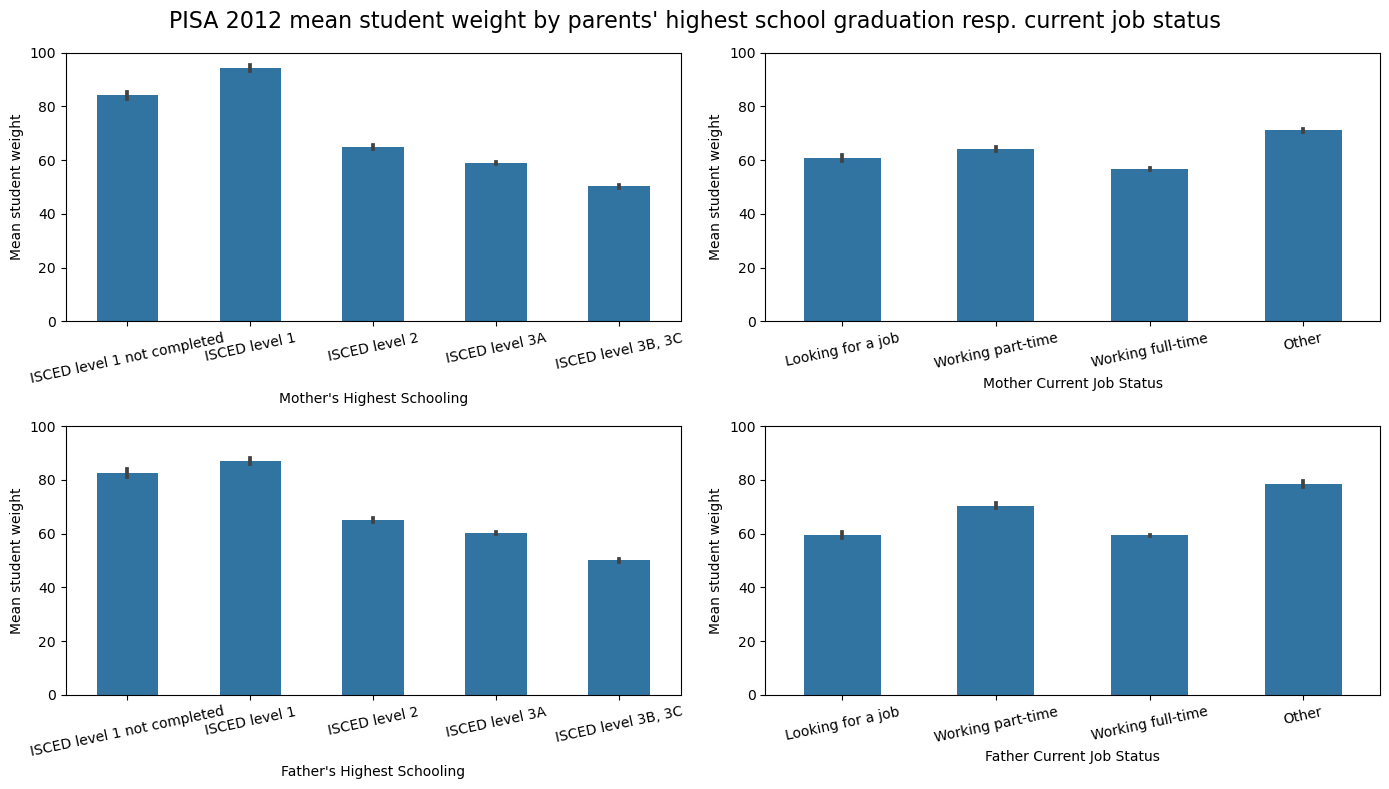

In [5]:
pisa12_lim = pisa12[pisa12['Final student weight'].between(10, 500)]
base_color = sb.color_palette()[0]

plt.figure(figsize=(14,8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0)


plt.subplot(2, 2, 1)
sb.barplot(data=pisa12_lim, 
           x='Mother\'s Highest Schooling', 
           y='Final student weight', 
           order=levels_order, 
           color=base_color, 
           width=0.5)
plt.xticks(rotation=12)
plt.ylabel('Mean student weight')
plt.ylim(0,100)


plt.subplot(2, 2, 2)
sb.barplot(data=pisa12_lim, 
           x='Mother Current Job Status', 
           y='Final student weight', 
           order=status_order, 
           color=base_color, 
           width=0.5)
plt.xticks(rotation=12)
plt.ylabel('Mean student weight')
plt.ylim(0,100)

plt.subplot(2, 2, 3)
sb.barplot(data=pisa12_lim, 
           x='Father\'s Highest Schooling', 
           y='Final student weight', 
           order=levels_order, 
           color=base_color, 
           width=0.5)
plt.xticks(rotation=12)
plt.ylabel('Mean student weight')
plt.ylim(0,100)

plt.subplot(2, 2, 4)
sb.barplot(data=pisa12_lim, 
           x='Father Current Job Status', 
           y='Final student weight', 
           order=status_order, 
           color=base_color, 
           width=0.5)
plt.xticks(rotation=12)
plt.ylabel('Mean student weight')
plt.ylim(0,100)

plt.suptitle('PISA 2012 mean student weight by parents\' highest school graduation resp. current job status', fontsize=16)
plt.tight_layout()

plt.show()

One explanation might be that there are a lot more students with highly graduated parents. The mean weights of students with low graduated parents might thus be pushed by outliers. In fact when playing aroung with ranges of student weight we accept to observe, the picture can vary, but not too much.

## Visualization 2 - Sense of belonging and success

- The second visualization suggests how important it is for students to feel like they belong to school.
- The heatmap shows that those students how strongly do not feel like belonging there can not achieve success.
- Takeaway: Feeling at least some basic comfort is necessary for succesful learning.

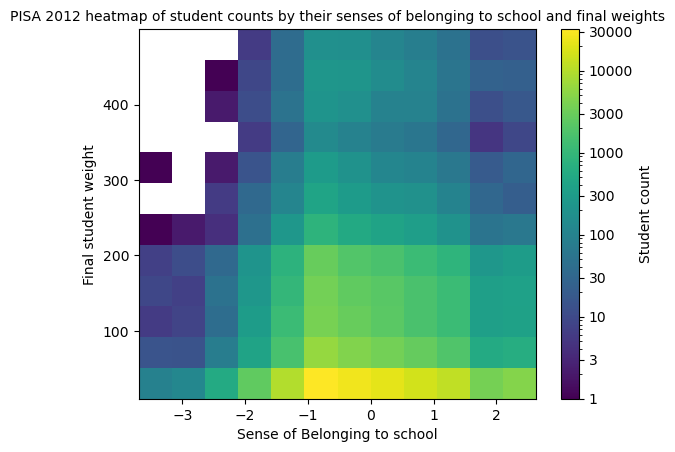

In [6]:
pisa12_belong = pisa12[pisa12['Sense of Belonging to School'].notnull() & pisa12['Final student weight'].between(10,500)]

plt.hist2d(data=pisa12_belong, x='Sense of Belonging to School', y='Final student weight', norm=mpl.colors.LogNorm(), bins=12)
plt.xlabel('Sense of Belonging to school')
plt.ylabel('Final student weight')

cticks = [0, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]

colorbar = plt.colorbar(label='Student count', ticks=cticks)
colorbar.ax.set_yticklabels(cticks)

plt.title('PISA 2012 heatmap of student counts by their senses of belonging to school and final weights', fontsize=10)

plt.show()

One more note: The many bad results should not worry us at this point. I guess that this is a matter of study execution.

## Visualization 3 - Follow up: Teacher's behaviour and sense of belonging

- Noticing the relation between bad feeling of belongig and success we can ask ourselves what teachers can do to support this feeling.
- This is what the next visualization is about: There is a lot teachers can do.
- Especially always encouraging to reflect problems and giving a lot of opportunity to express opinions can help.
- Special note: Emphasizing the importance of hard work can backfire, assumingly due to pressure.

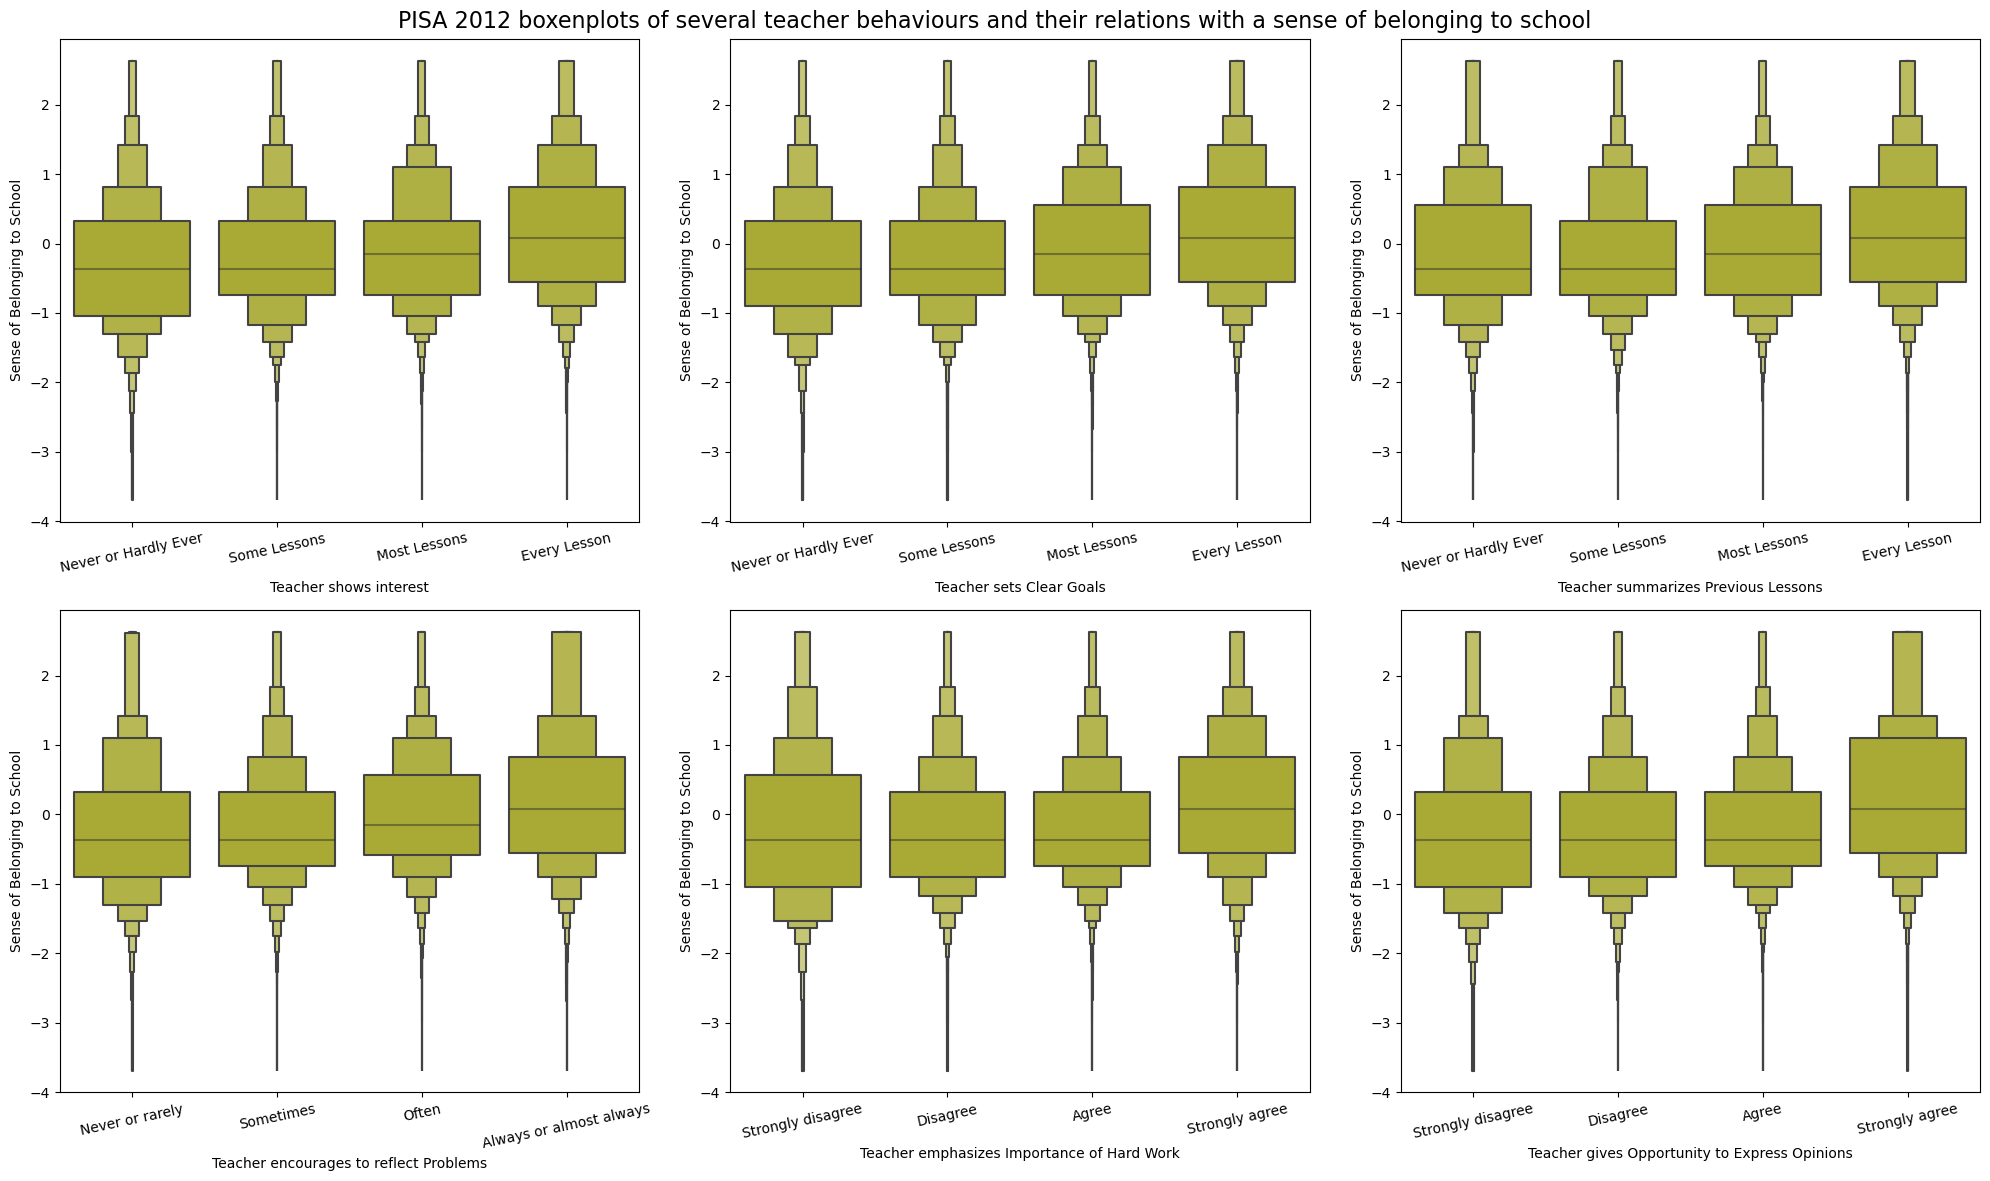

In [7]:
#Choose only nonnull-Values
pisa12_teacher = pisa12[pisa12['Teacher shows interest'].notnull()]
frequency_order = ['Never or Hardly Ever', 'Some Lessons', 'Most Lessons', 'Every Lesson']
base_color = sb.color_palette()[8]

#Create figure for six diagrams
plt.figure(figsize=(20,12))
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0)

plt.subplot(2, 3, 1)
sb.boxenplot(data=pisa12_teacher, x='Teacher shows interest', y='Sense of Belonging to School', order=frequency_order, color=base_color)
plt.xticks(rotation=12)

plt.subplot(2, 3, 2)
sb.boxenplot(data=pisa12_teacher, x='Teacher sets Clear Goals', y='Sense of Belonging to School', order=frequency_order, color=base_color)
plt.xticks(rotation=12)

plt.subplot(2, 3, 3)
sb.boxenplot(data=pisa12_teacher, x='Teacher summarizes Previous Lessons', y='Sense of Belonging to School', order=frequency_order, color=base_color)
plt.xticks(rotation=12)

plt.subplot(2, 3, 4)
reflect_order=['Never or rarely', 'Sometimes', 'Often', 'Always or almost always']
sb.boxenplot(data=pisa12_teacher, x='Teacher encourages to reflect Problems', y='Sense of Belonging to School', order=reflect_order, color=base_color)
plt.xticks(rotation=12)

plt.subplot(2, 3, 5)
accordance_order=['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
sb.boxenplot(data=pisa12_teacher, x='Teacher emphasizes Importance of Hard Work', y='Sense of Belonging to School', order=accordance_order, color=base_color)
plt.xticks(rotation=12)

plt.subplot(2, 3, 6)
sb.boxenplot(data=pisa12_teacher, x='Teacher gives Opportunity to Express Opinions', y='Sense of Belonging to School', order=accordance_order, color=base_color)
plt.xticks(rotation=12)

plt.suptitle('PISA 2012 boxenplots of several teacher behaviours and their relations with a sense of belonging to school', fontsize=16)
plt.tight_layout()

plt.show()

## Visualization 4:  Student-teacher-relationship and success by sense of belonging ranges.

- Eventually we can ask if teacher virtues like listening to their students and treating them fair always saves the day.
- The answer by the pointplot: being listened to rather helps students that already sense belonging. Being treatet fair is most important for students who don't.
- We can maybe explain this by coherence: being listened to and sensing belonging should correlate strongly as both are about human relationships. So the more one senses belonging the more one depends on human qualities. On the other hand if you don't sense belonging at least professional fairness can reach your perception.

In [8]:
#Cut df into ranges of sense of belongig to school
belong_low = pisa12[pisa12['Sense of Belonging to School'].between(-1.5, -0.5)]
belong_mid = pisa12[pisa12['Sense of Belonging to School'].between(-0.5, 1.5)]
belong_high = pisa12[pisa12['Sense of Belonging to School'].between(0.5, 1.5)]
belong_ranges = [belong_low, belong_mid, belong_high]

In [9]:
def myPointPlot(df, 
                xVar = 'Relation - Teachers Listen to Students', 
                yVar = 'Final student weight', 
                hue = 'Relation - Teachers Treat Students Fair', 
                color = 0, 
                palette = 'Greens', 
                order = accordance_order, 
                hue_order = accordance_order, 
                figsize = [14, 6],
                ax = None, 
                title = ''):
    '''
    parameters: df : data to be plotted
                xVar : df-column for x-axis
                yVar : df-column for y-axis
                hue : df-column to be colored
                color : element in  seaborn standard color_palette, single color for the elements in the plot
                palette : seaborn color_palette for hue
                order : order for (categorical) xVar
                hue_order : order for (categorical) hue
                figsize : size for figure if not ax
                ax : number of subplot
                title : title of single pointplot
    
    output: pointplot with parameters (optionally as subplot)
    '''
    
    if not ax:
        # set plot dimensions
        plt.figure(figsize=figsize)
        ax=plt.gca()
        
    # plot
    sb.pointplot(data=df, x=xVar, y=yVar, hue=hue, color=sb.color_palette()[color],
                 palette=palette, order=order, hue_order=hue_order, ax=ax,
                 linestyles='', dodge = 0.3, errorbar=('ci', 90));
    
    # AFTER plotting, clean up variable names 
    xVar=xVar.replace("_", " ") # replace _ with a space 
    yvar=yVar.replace("_", " ") # replace _ with a space
    
    if hue:
        hue=hue.replace("_", " ")
    # Add title and format it
    ax.set_title(f'''{title}'''.title(), fontsize = 10, weight = "bold" )
    # Add × label and format it
    ax.set_xlabel(xVar.title(), fontsize = 8, weight = "bold")
    # Add y label and format it
    ax. set_ylabel(f'Average {yVar}'.title(), fontsize = 8, weight = "bold" )

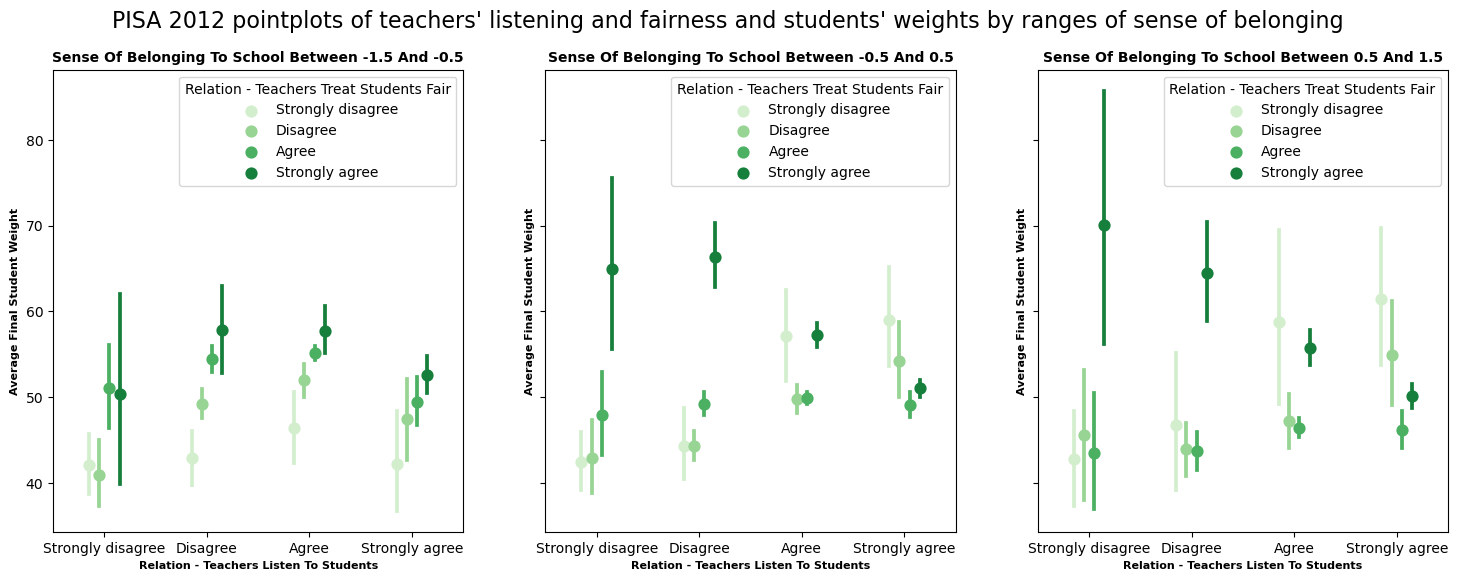

In [10]:
#Pointplots of relationship between 'Relation - Teachers Listen to Students', 
#'Relation - Teachers Treat Students Fair' and 'Final student score'
#for df-cuts above
fig, ax = plt.subplots(ncols = 3, figsize = [18,6], sharey=True)

for i in range(3):
    myPointPlot(belong_ranges[i], ax=ax[i], title='Sense of belonging to school between ' + str(i-1.5) + ' and ' + str(i-0.5))

plt.suptitle('PISA 2012 pointplots of teachers\' listening and fairness and students\' weights by ranges of sense of belonging', fontsize=16)
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [11]:
jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

SyntaxError: invalid syntax (2335912878.py, line 1)

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 